# <center><font color=	DarkRed>OpenFoodFact : Préparez des données pour un organisme de santé publique</font></center><br>

**<font color=DarkRed>La mission</font>** est de réaliser une analyse exploratoire pour **rendre les données de santé plus accessibles.** 

**<font color=DarkRed>L'environnement de développement</font>** a été installé via la distribution <code>**Anaconda**</code>, intégrant en natif :
- le langage de programmation <code>**Python**</code>, adapté pour l'analyse de données,
- le <code>**Jupyter Notebook**</code>, qui permet de rassembler dans un même document du texte, des images et du code informatique exécutable et manipulable dans un navigateur web .<br>

J'ai créé un **environnement virtuel** dédié à ce projet dans <code>**Anaconda**</code> pour assurer l'isolement du projet et la gestion des dépendances.

**<font color=DarkRed>La méthodologie :</font>** 
- Traiter le jeu de données afin de repérer des **variables pertinentes** pour les traitements à venir. Automatiser ces traitements pour éviter de répéter ces opérations.

- Produire des **visualisations** afin de mieux comprendre les données. Effectuer une **analyse univariée** pour chaque variable intéressante, afin de synthétiser son comportement. 

- Confirmer ou infirmer des hypothèses à l’aide d’une **analyse multivariée descriptive et explicative**. Effectuer les **tests statistiques** appropriées (une méthode descriptive, et une méthode explicative) pour vérifier la significativité des résultats.

<hr>

La première étape consiste en l'**importation des librairies <code>Python</code>** nécessaires à l'analyse dans le <code>**Jupyter Notebook**</code> : <br>
- <code>**NumPy**</code>, 
- <code>**Pandas**</code>, 
- <code>**Matplotlib**</code>, 
- <code>**Seaborn**</code>, 
- <code>**Missingno**</code>,
- <code>**Scipy**</code>.

## Importation des librairies

In [1]:
# Importer les librairies utiles 
import pandas as pd # pour importer les données sous formes de dataframe
import numpy as np
from scipy.stats import chi2_contingency

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno # pour afficher les données manquantes


#Utilisationde la méthode "setOption()"
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

dim_fig = (10,5)

## Declaration des fonctions

Cette section va me permettre de faciliter l'analyse en automatisant des actions d'analyses statistiques ou de filtres par exemple.

In [105]:
def taux_remplissage(df, min_threshold,label_min_threshold,max_threshold,label_max_threshold):
    """
    Cette fonction permet d'afficher le taux de remplissage du dataset avec un graphique en barreshorizontale
    avec pour abscisses la liste des variables
    et pour ordonnées le taux de remplissage en pourcentage
    
    Arguments : dataframe, le seuil minimum , le seuil maximum, 
    Résultat : Diagramme en bar horizontale avec le % du taux de remplissage avec affichage du seuil renseignée
    """
# Calcul du taux de remplissage des colonnes
    rate = pd.DataFrame(
        df.count()/df.shape[0]*100,
        columns=["Taux de remplissage"]).sort_values("Taux de remplissage", 
                                                 ascending=False).reset_index()

    # Plot
    fig, axs = plt.subplots(figsize=(10,35))
    sns.barplot(y=rate["index"], x="Taux de remplissage", 
                data=rate, palette="rainbow_r")# Permuter x et y change le sens du graph
    plt.title("Taux de remplissage des variables", fontsize=14)
    plt.xlabel("Taux de remplissage (%)")
    plt.ylabel("")
    plt.axvline(x=min_threshold, color='g')
    plt.text(min_threshold, -1, label_min_threshold, color='g', fontsize=14)
    plt.axvline(x=max_threshold, color='r')
    plt.text(max_threshold, -1, label_max_threshold, color='r', fontsize=14)
    return plt.show()

# Fonction représentant graphiquement le % de complétude des variables du DataFrame
def graphique_completude_donnees(df, titre):
    """
    Cette fonction permet d'afficher un graphique en barres avec pour abscisses la liste des variables
    et pour ordonnées le pourcentage de valeurs renseignées par variable
    
    Arguments : dataframe, titre du graphique
    Résultat : Diagramme en bar avec le % de complétude des données
    """
    val_renseigne_pour100 = pd.DataFrame(df.count() / df.shape[0] * 100,
                                         columns=["% de complétude"]
                                        ).sort_values("% de complétude", 
                                                      ascending=False).reset_index()
    
    fig, axs = plt.subplots(figsize=(18, 6))
    plt.rcParams["xtick.bottom"] = plt.rcParams["xtick.labelbottom"] = True
    plt.rcParams["xtick.top"] = plt.rcParams["xtick.labeltop"] = False
    graph = sns.barplot(y="% de complétude", 
                x=val_renseigne_pour100["index"], 
                data=val_renseigne_pour100, 
                palette="Blues_d")
    plt.title(titre, fontsize=18)
    plt.xlabel("")
    plt.xticks(rotation=90, fontsize=14)
    plt.ylabel("% de complétude", fontsize=14)
    return plt.show()


# Résumé des données par colonne avec une fonction spécifique
def resume_col_data(df):
    """
    Cette fonction permet d'analyser des valeurs manquantes du dataset avec pour chaque variable du dataset : 
    - le nombre de valeurs uniques 
    - le nombre de valeurs Non-nulles
    - le nombre de valeurs manquantes
    - le nombre de valeurs a zéro
    - le types de données
    
    Arguments : dataframe 
    Résultat : Un tableau avec en colonnes les analyses ci-dessus 
    """
    # Valeurs calculées pour chaque colonne
    val_unique = df.nunique(dropna=False) # Nb Valeurs uniques, y compris les valeurs manquantes
    val_non_nulle = df.count(axis=0) # Nb de valeurs Non-nulles
    val_manq = df.isnull().sum() # Nb de valeurs manquantes
    val_manq_pourcent = 100 * df.isnull().sum() / len(df) # % de valeurs manquantes
    val_zero = (df == 0.00).astype(int).sum(axis=0) # Nb de valeurs à zéro
    val_zero_pourcent = 100 *((df == 0.00).astype(int).sum(axis=0)) / len(df)
    # Création d'une table de donnée ayant pour colonne les valeurs calculées
    ts_table = pd.concat([val_unique, val_non_nulle, val_manq, val_manq_pourcent, val_zero, \
                              val_zero_pourcent], axis=1)
    # Libellés explicites pour chaque colonne
    ts_table = ts_table.rename(
    columns = {0 : "Valeurs uniques", 1 : "Valeurs non-nulles", 2 : "Valeurs manquantes", \
                   3 : "% Valeurs manquantes", 4 : "Valeurs à zéro", 5 : "% Zéro"})
    # Ajout de la colonne de type de données à la table de données
    ts_table['Type Données'] = df.dtypes
    # Création d'un filtre sur les valeurs manquantes
    filtre_vm = ts_table[ts_table["Valeurs manquantes"] != 0]
    # Tri décroissant sur la colonne "Valeurs manquantes"
    ts_table = ts_table[
            ts_table.iloc[:,0] != 0].sort_values("% Valeurs manquantes", ascending=False).round(1)
    # Afficher le nombre de colonnes et de lignes au total et le nombre de colonnes avec vlr manquantes
    print("Le DataFrame a",'\033[1m' + str(df.shape[1]),"colonnes" + '\033[0m', "et",'\033[1m' +str(df.shape[0]),"lignes"+ '\033[0m',"(y compris les en-têtes).\n"    
            "Il y a " + '\033[1m' + str(filtre_vm.shape[0]) + " colonnes" + '\033[0m', "ayant des valeurs manquantes.")
    print('\033[1m' + "Les types de données :\n" + '\033[0m',df.dtypes.value_counts())

    return ts_table

def duplicated_values(col, df_init):
    for col in col:
        print(
            "Il y a {0} doublons (en lignes) dans \ les colonnes {1}.".format(df_init.duplicated
                                                                              (col).sum(), col))

# Création d'une fonction de paragraphe de synthèse
def synthese_generale(df_init, df_clean, seuil):
    """
    Cette fonction permet d'afficher un paragraphe de synthese repertoriant : 
    - le % des données de dataframe d'origine
    - le nombre de colonnes ayant des valeurs manquantes
    - la taille du jeu de donnée avant nettoyage
    - la taille du jeu de donnée après nettoyage
    - le types de données
    
    Arguments : dataframe d'origine, dataframe nettoyé, le seuil en pourcentage de valeurs manquantes
    Résultat : Un paragraphe de synthese 
    """
    # Affichage de la dimension
    print("Le DataFrame a " + str(df_init.shape[0]) + " lignes et " + str(df_init.shape[1]) + " colonnes,")
    print("soit " + str(round((len(df_init) / len(df_clean) * 100))) + "% des données du DataFrame original.\n")
    # Valeurs manquantes
    nb_lignes, nb_cols = df_init.shape
    nb_manquants = df_init.isnull().sum()
    print ("Il y a " + str(nb_manquants[(nb_manquants != 0)].shape[0]) + " colonnes ayant des valeurs manquantes,")
    cols_vides = ((nb_manquants / nb_lignes) >= seuil)
    somme_cols_vides = cols_vides.sum()
    message = (f"dont {somme_cols_vides} colonnes avec {seuil * 100:0.0f}% de données manquantes.\n")
    print(message)
    
    print(f"Taille du jeu de donnée avant nettoyage {df_init.shape}")
    print(f"Taille du jeu de donnée après nettoyage {df_clean.shape}")

    print(f"Nous avons supprimé {df_init.shape[1]- df_clean.shape[1]} columns")
    print(f"Nous avons supprimé {df_init.shape[0]- df_clean.shape[0]} rows")
    
    # Affichage des types de variables du DataFrame
    print("Les types de données :\n",df_init.dtypes.value_counts())
    
def graph_distrib(df, features, title):
    """
    Cette fonction permet de visualiser la distribution de chaque variable à l'aide d'un graphique (histogramme) qui comprend la visualisation de 
    la moyenne, la mediane et de la courbes de densité

    Arguments : dataframe, colonnes , titre du graphique   
    Résultat : un graphique de visualisation de la distribution pour chaque variable 
    """
    sns.set_style("whitegrid")
    fig = plt.figure(figsize=(21,10))

    sub = 0
    for i in range(len(features)):
        fig.add_subplot(2,5,i+1)
        colonne = features[i]
        kstest = stats.kstest(df[colonne].notnull(),'norm')
        ax = sns.distplot(df[colonne], fit=stats.norm, kde=False)
        ax.set_title("Distribution vs loi normale : {}".format(colonne))
        ax.axvline(df[colonne].median(), color="r", ls="-", label="med")
        #ax.text((gauche+.15), (bas_page+.6), "med", color="r", transform=axs.transAxes)
        ax.axvline(df[colonne].mean(), color="g", ls="--", label="moy")
        ax.legend(loc ="center right")
        sub += 1 
    plt.suptitle(title, fontsize=20)
    plt.show()



## <center><font color=darkRed>1. - Présentation générale du jeu de données</font></center>

<center>
<img src="../image/1200px-Open_Food_Facts_logo.svg.png", style="width:250px"> </td>
</center>

Le **jeu de données** OpenFoodFacts, est une base de données sur les produits alimentaires faite par tout le monde, pour tout le monde, il est disponible à ce lien : <a>[openfoodfacts.org](https://world.openfoodfacts.org/)</a>.

Dans cette 1ère partie, je vais **établir le profil** du jeu de données : c'est un processus qui aide à avoir un **aperçu** des données à notre disposition.

J'utilise la librairie <code>**Pandas**</code> pour l'**importation** du fichier texte "**openfoodfacts.csv**" afin de le charger vers un <code>**DataFrame**</code>, que je vais appeler **<code><font color=DarkRed>df</font></code>**.  

*Un **DataFrame** est une structure de données ressemblant à un tableau en 2 dimensions, incluant des lignes (<code>axis=0</code>) et des colonnes (<code>axis=1</code>).*


In [3]:
data = "../data/fr.openfoodfacts.org.products.csv"

In [4]:
df = pd.read_csv(data, sep =r'\t', engine='python')

In [5]:
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,NaN,28 g (1 ONZ),NaN,0.0,[ bananas -> en:banan

In [6]:
print("Le DataFrame a",'\033[1m' + str(df.shape[1]),"colonnes" + '\033[0m', "et",'\033[1m' +str(df.shape[0]),"lignes"+ '\033[0m',"(y compris les en-têtes).\n") 
print('\033[1m' + "Les types de données :\n" + '\033[0m',df.dtypes.value_counts())
df.describe(include="all")

Le DataFrame a 162 colonnes et 320772 lignes (y compris les en-têtes).

Les types de données :
 float64    107
object      55
dtype: int64


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,320772,320769,320762,320772,320771,320772,320771,303006,52773,104800,78960,78961,292381,292352,84411,84411,84411,22190,22153,36479,36473,46581,46644,46645,29306,29325,18826,23,20320,58193,51722,320492,320492,320488,248958,28348,0.0,24353,24352,24329,211308,0.0,248939.000000,248905,154680,154680,248939.000000,0.0,4835,248939.000000,0.0,11696,0.0,221210,91513,94491,320726,320726,320726,84366,84366,75836,75836,2.611130e+05,857.000000,243891.000000,229554.000000,0.0,0.0,1.0,2.000000,4.000000,1.0,24.000000,24.000000,1.000,0.0,0.0,0.0,1.0,0.0,22823.000000,22859.000000,846.000000,209.000000,33.000000,55.000000,188.000000,172.000000,31.000000,1.000,0.0,21.000000,27.000000,0.0,0.0,0.0,0.0,0.0,143298.000000,144090.000000,243588.000000,244971.000000,72.000000,26.000000,38.000000,262.000000,4.000000,11.000000,266.000000,430.000000,200886.000000,259906.000000,27.000000,16.000000,9.000000,255510.000000,255463.000000,4133.000000,137554.000000,34.000000,7057.000000,1340.000000,918.000000,140867.000000,11164.000000,10815.000000,11719.000000,6784.000000,5240.000000,3065.000000,5.323000e+03,307.000000,2460.000000,38.000000,81.000000,24748.000000,158.000000,141050.000000,5845.000000,140462.000000,6253.000000,3929.000000,2106.000000,1620.000000,79.000000,1168.000000,20.000000,11.000000,259.000000,78.000000,29.000000,49.000000,3036.000000,165.000000,948.000000,0.0,268.000000,221210.

### Visualisation de la complétion des données

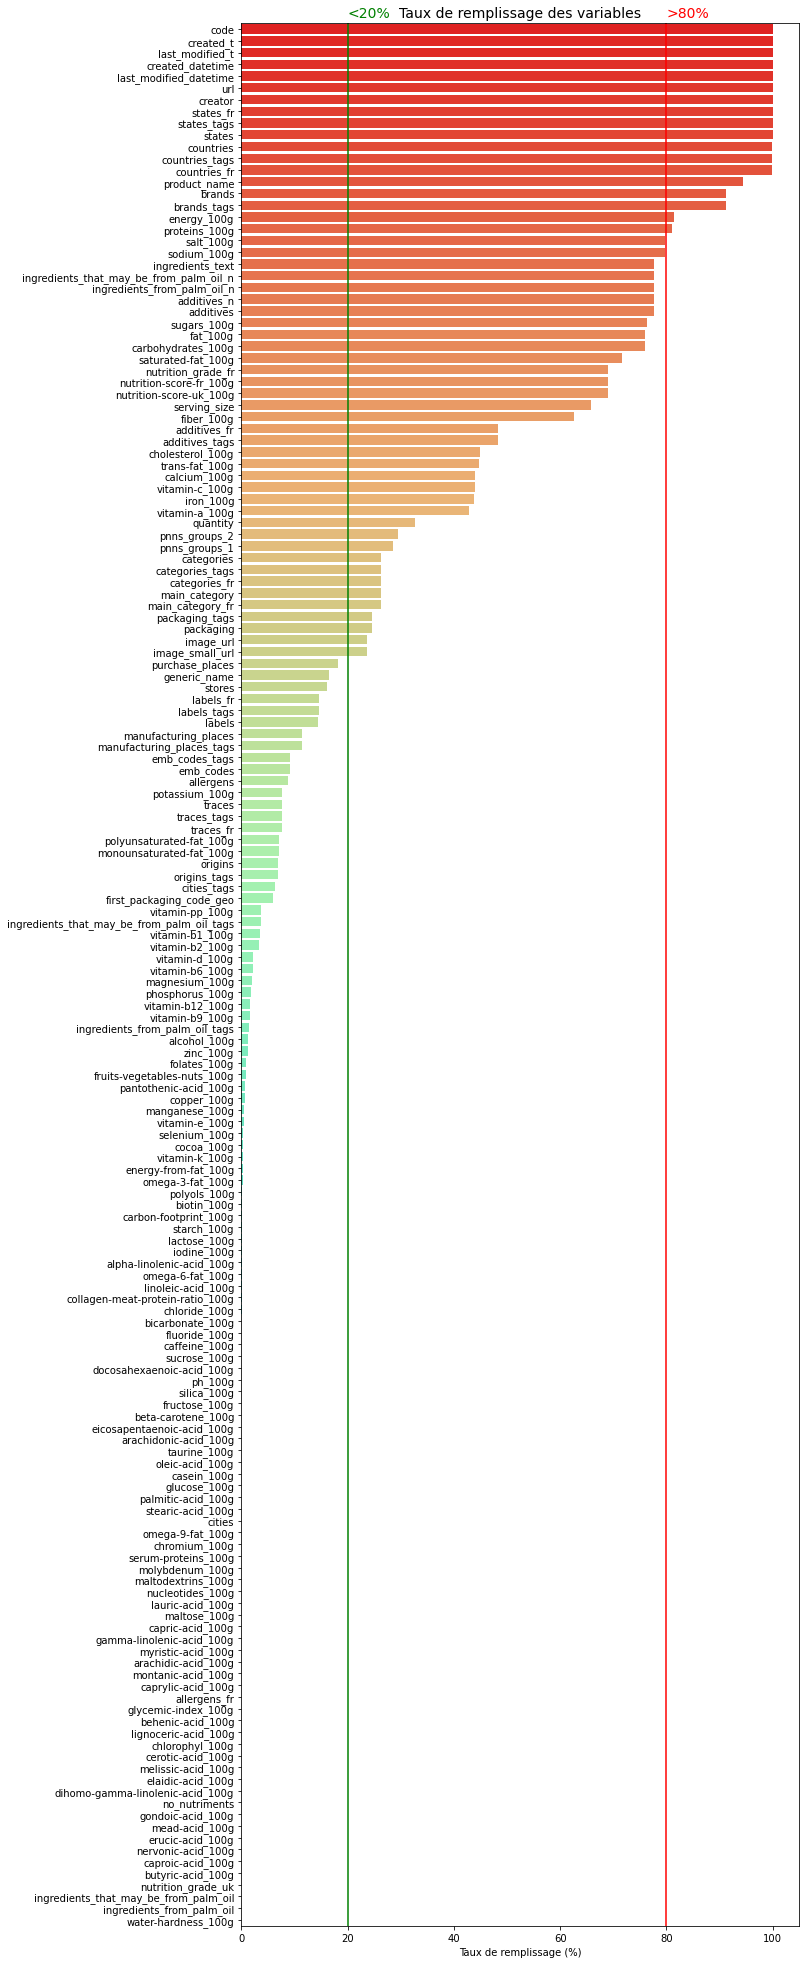

In [7]:
taux_remplissage(df, 20,'<20%', 80,">80%")

**<center>Synthèse du jeu de données</center>**

| **Indicateurs** | **Valeurs** |
| :--- | :---: |
| **Nombre de colonnes** | 162 |
| **Nombre de lignes** | 320.772  |
| **Nombre de variables qualitatives** | 55 |
| **Nombre de variables quantitatives** | 107 |

### <center><font color=DarkBlue>1.1 - Description du jeu de données</font></center>

Pour décrire le jeu de données, j'utilise la méthode **.describe()**, qui <font color=DarkRed>**calcule et affiche des statistiques récapitulatives pour une trame de données**</font> 

Je souhaite afficher la description de tous les types de données de mon dataframe en incluant les données qualitatives, pour ce faire, j'indique en argument de la méthode <code>**include="all"**</code>

**les statistiques afficher pour tout les types de données sont les suivantes :**

- <font color=DarkRed>**les données numériques**</font> :

    - le nombre de valeurs non-vide (`count`)
    - la moyenne (`mean`)
    - l'écart-type (`std`), (mesure de la dispersion d'un ensemble de valeurs autour de la moyenne, Plus l'écart-type est faible, plus la population est homogène)
    - les valeurs minimale (`min`) et maximale (`max`)
    - les centiles : 
        - **25 %**: le 1er quartile (valeur au-dessus de laquelle se situent 75% des individus);
        - **50 %**: le 2nd quartile ou médiane (valeur au-dessus de laquelle se situent 50% des individus);
        - **75 %**: le 3e quartile (valeur au dessus de laquelle se situent 25% des individus) ;
        
**NOTE** : les quartiles sont les 3 valeurs qui partagent une distribution en quatre parties égales, ils font partie des quantiles.

- <font color=DarkRed>**les données textuelles**</font> :

    - le nombre de valeurs non-vide (`count`)
    - le nombre de valeurs différentes (`unique`)
    - la valeur la plus représentée (`top`)
    - la fréquence de la valeur la plus courante (`freq`)

In [8]:
df.describe(include="all")

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,320772,320769,320762,320772,320771,320772,320771,303006,52773,104800,78960,78961,292381,292352,84411,84411,84411,22190,22153,36479,36473,46581,46644,46645,29306,29325,18826,23,20320,58193,51722,320492,320492,320488,248958,28348,0.0,24353,24352,24329,211308,0.0,248939.000000,248905,154680,154680,248939.000000,0.0,4835,248939.000000,0.0,11696,0.0,221210,91513,94491,320726,320726,320726,84366,84366,75836,75836,2.611130e+05,857.000000,243891.000000,229554.000000,0.0,0.0,1.0,2.000000,4.000000,1.0,24.000000,24.000000,1.000,0.0,0.0,0.0,1.0,0.0,22823.000000,22859.000000,846.000000,209.000000,33.000000,55.000000,188.000000,172.000000,31.000000,1.000,0.0,21.000000,27.000000,0.0,0.0,0.0,0.0,0.0,143298.000000,144090.000000,243588.000000,244971.000000,72.000000,26.000000,38.000000,262.000000,4.000000,11.000000,266.000000,430.000000,200886.000000,259906.000000,27.000000,16.000000,9.000000,255510.000000,255463.000000,4133.000000,137554.000000,34.000000,7057.000000,1340.000000,918.000000,140867.000000,11164.000000,10815.000000,11719.000000,6784.000000,5240.000000,3065.000000,5.323000e+03,307.000000,2460.000000,38.000000,81.000000,24748.000000,158.000000,141050.000000,5845.000000,140462.000000,6253.000000,3929.000000,2106.000000,1620.000000,79.000000,1168.000000,20.000000,11.000000,259.000000,78.000000,29.000000,49.000000,3036.000000,165.000000,948.000000,0.0,268.000000,221210.

Le dataset contient beaucoup de données, il y a **186 colonnes** et **2 312.805 lignes**, il va donc falloir faire le tri afin de sélectionner les colonnes les plus pertinentes avant de continuer.

L'application concerne l'agence **Santé Publique France**, je sélectionne donc uniquement les produits vendus en France. Et ensuite, je vais sélectionner seulement les variables qui m'intéressent en fonction de mon idée d'application.

In [9]:
product_fr = (df['countries'].str.contains('Fr|fr|France|france', na=False, regex=True)) | (df['countries_tags'].str.contains('Fr|fr|France|france', na=False, regex=True))

In [10]:
print("Je sélectionne ",len(df[product_fr])," individus, lignes, soit ",np.around(len(df[product_fr])/len(df)*100,decimals=2),"% individus du fichier initial")


Je sélectionne  98651  individus, lignes, soit  30.75 % individus du fichier initial


In [11]:
data_fr = df[product_fr]

In [12]:
data_df = data_fr.drop(["countries", "countries_tags", "countries_fr"],axis=1)

### <center><font color=DarkBlue>1.1.1 - Idée d'application</font></center>

#### Moteur de recommandation de produit pour les personnes présentant un diabète, les sportifs ou les personnes souhaitant débuter un régime

**Recommander des produits en fonction des besoins en nutriment**, une fois les besoins calculés **l'idée de l'application est de pouvoir à partir de la recherche d'un produit, recommander une liste de produits sains (produit le plus sain donc nutri-score le plus bas, et nombre de grammes de nutriment en fonction du besoin exprimées).**

### <center><font color=DarkGreen>1.1.2 - Sélection des variables intéressantes</font></center>

Pour l'application, je vais donc avoir besoin d'avoir des informations suivantes :

**Informations "Générales" :**
- <code>code</code> : le code barre d'identification des produits
- <code>product_name</code>  : le nom du produit
- <code>brands</code>  : la marque du produit

**Groupe d'aliments :**
- <code>categories</code>  : la liste des catégories auxquelles appartient le produit
- <code>main_category_fr</code>  : en Français, la catégorie principale auquel appartient le produit
- <code>pnns_groups_1</code>  : la catégorie principale du produit selon le PNNS(Programme National Nutrition Santé)
- <code>pnns_groups_2</code>  : la catégorie secondaire du produit selon le PNNS

**Ingredients des produits :**
- <code>ingredients_text</code> : les ingredients du produit

**Nutriments pour 100g :**
- <code>fiber_100g</code>  : fibres pour 100g
- <code>fat_100g</code>  : graisses ou lipides pour 100g
- <code>saturated-fat_100g</code>  : graisses saturées pour 100g , quantité inclue dans 'fat_100g'
- <code>carbohydrates_100g</code>  : glucides pour 100g
- <code>sugars_100g</code>  : sucres pour 100g, quantité inclue dans 'carbohydrates_100g'
- <code>proteins_100g</code>  : proteines pour 100g
- <code>salt_100g</code>  : sel pour 100g
- <code>sodium_100g</code>  : sodium pour 100g sachant que, quantité de sodium = (quantité de sel)/2,5

**Energie pour 100g :**
- <code>energy_100g</code> : quantité d'énergie pour 100g, unité pas précisée

**Scores de nutrition :**
- <code>nutrition_grade_fr</code> : la note, en fonction du score du produit. Les notes vont de A à E
- <code>nutrition-score-fr_100g</code> : le score du produit, France

Au total j'ai donc sélectionné **19 variables**.

In [13]:
col = ['code','product_name','brands','categories','main_category_fr','pnns_groups_1','pnns_groups_2','ingredients_text','fiber_100g','fat_100g',
       'saturated-fat_100g','carbohydrates_100g','sugars_100g','proteins_100g','salt_100g','sodium_100g','energy_100g',
       'nutrition_grade_fr','nutrition-score-fr_100g']

Création d'un dataframe de travail contenant uniquement les **19 variables sélectionnées** précédemment :

In [14]:
dataDiab=pd.DataFrame(data_fr, columns=col)

In [15]:
print("Le DataFrame a",'\033[1m' + str(dataDiab.shape[1]),"colonnes" + '\033[0m', "et",'\033[1m' +str(dataDiab.shape[0]),"lignes"+ '\033[0m',"(y compris les en-têtes).\n") 

dataDiab.describe(include="all")

Le DataFrame a 19 colonnes et 98651 lignes (y compris les en-têtes).



,code,product_name,brands,categories,main_category_fr,pnns_groups_1,pnns_groups_2,ingredients_text,fiber_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,energy_100g,nutrition_grade_fr,nutrition-score-fr_100g
count,98651,91426,86595,62084,62076,65009,67168,53590,45781.000000,47748.000000,62457.000000,47314.000000,62607.000000,64423.000000,62667.000000,62664.000000,6.469700e+04,61496,61496.000000
unique,98644,74501,21093,26723,1623,13,41,49218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN
top,villecomtal-sur-arros-gers-france,Huile d'olive vierge extra,Carrefour,"Snacks sucrés,Biscuits et gâteaux,Biscuits",Boissons,unknown,unknown,Semoule de _blé_ dur de qualité supérieure.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,d,NaN
freq,8,62,2838,291,4438,12529,12529,110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17015,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.559222,13.334238,5.425018,27.759732,13.436487,7.753130,1.160364,0.456857,1.171482e+03,NaN,8.684207
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.633612,16.937911,8.535046,27.415239,19.092924,7.886613,4.308789,1.696359,1.282563e+04,NaN,9.046655
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,-0.100000,0.000000,0.000000,0.000000,0.000000e+00,NaN,-15.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.300000,0.300000,4.000000,1.000000,1.800000,0.080000,0.031496,4.270000e+02,NaN,1.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380000,6.800000,2.000000,14.500000,4.100000,6.000000,0.558800,0.220000,1.035000e+03,NaN,9.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.200000,21.000000,7.400000,53.000000,17.800000,11.000000,1.240000,0.490000,1.649000e+03,NaN,15.000000


Je vais renommer le nom des colonnes en français afin d'avoir une meilleure compréhension de ceux-ci

In [16]:
dataDiab.rename(columns={'product_name' : 'nom_produit',
                         'brands' : 'marques',
                         'ingredients_text' : 'ingredients',
                        'fiber_100g': 'fibre_100g', 
                        'fat_100g': 'lipides_100g',
                        'saturated-fat_100g': 'graisse-satures_100g',
                        'carbohydrates_100g': 'glucides_100g',
                        'sugars_100g':'sucres_100g',
                        'proteins_100g' : 'proteine_100g',
                        'salt_100g' : 'sel_100g',
                        'nutrition_grade_fr' : "nutrition_grade",
                        'nutrition-score-fr_100g' : 'nutrition_score'}, 
                inplace=True)

## <center><font color=DarkBlue>1.2 - Selection et analyses des variables d'interet</font></center>

### <center><font color=DarkGreen>1.2.1 - Traitement des doublons</font></center>

Je commence par uniformiser la colonne product_name (lowercase) pour ne pas passer à côté de doublons sur des syntaxes différentes puis j'analyse les doublons pour appliquer une stratégie afin de les supprimer.

In [ ]:
doublons_subset(dataDiab, 'nom_produit', ["nom_produit", "marques"])

In [17]:
# Mise en minuscule des colonnes du dataframe
dataDiab['nom_produit'] = dataDiab['nom_produit'].str.lower()

In [18]:
# Fonction pour trouver les colonnes pertinentes dans la recherche de doublons
var_doublons = [["code"], ["nom_produit"], ["code", "nom_produit"], ["nom_produit", "marques"]]

duplicated_values(var_doublons, dataDiab)

Il y a 7 doublons (en lignes) dans \ les colonnes ['code'].
Il y a 29203 doublons (en lignes) dans \ les colonnes ['nom_produit'].
Il y a 4 doublons (en lignes) dans \ les colonnes ['code', 'nom_produit'].
Il y a 11647 doublons (en lignes) dans \ les colonnes ['nom_produit', 'marques'].


Après cette analyse, j'observe que :
- <code>**code**</code> tout seul, ou en combinaison avec <code>**product_name**</code> retourne quelques doublon ;
- <code>**product_name**</code> tout seul retourne ~29k doublons, et en combinaison avec <code>**brands**</code>, ~11k doublons.

Dans la mesure où plusieurs produits peuvent porter le même nom (ex: 6 oeufs bio), je prends le subset <code>**[product_name, brands]**</code> pour supprimer des doublons.

#### <center><font color=DarkGreen>1.2.1.1 - Suppression des doublons</font></center>

In [19]:
# Elimination des doublons en utilisant l'argument 'subset'
dataDiab.drop_duplicates(subset=["nom_produit", "marques"], inplace=True)

# Affichage de la dimension du DataFrame
print("Le DataFrame FRANCE a " + str(dataDiab.shape[0]) 
      + " lignes et " + str(dataDiab.shape[1]) + " colonnes.\n")

Le DataFrame FRANCE a 87004 lignes et 19 colonnes.



### <center><font color=DarkGreen>1.2.2 - Traitement des produits</font></center>

#### <center><font color=DarkGreen>1.2.2.1 - Produits sans nom</font></center>

In [20]:
data_product=pd.DataFrame(dataDiab, columns=['code','nom_produit','marques'])
data_product.head()

,code,nom_produit,marques
0,0000000003087,farine de blé noir,Ferme t'y R'nao
46,0000000024600,filet de bœuf,NaN
48,0000000027205,NaN,NaN
106,0000000036252,lion peanut x2,Sunridge
136,0000000039259,twix x2,NaN


In [21]:
# analyse des produits sans nom
resume_col_data(data_product)

Le DataFrame a 3 colonnes et 87004 lignes (y compris les en-têtes).
Il y a 2 colonnes ayant des valeurs manquantes.
Les types de données :
 object    3
dtype: int64


,Valeurs uniques,Valeurs non-nulles,Valeurs manquantes,% Valeurs manquantes,Valeurs à zéro,% Zéro,Type Données
marques,21094,81725,5279,6.1,0,0.0,object
nom_produit,69448,86529,475,0.5,0,0.0,object
code,86997,87004,0,0.0,0,0.0,object


In [22]:
# Comptage du nombre de produits sans nom
data_product[data_product["nom_produit"].isnull()].count()

code           475
nom_produit      0
marques        474
dtype: int64

In [23]:
# Suppression des lignes où le nom du produit est manquant
dataDiab.dropna(axis=0, how="any", subset=["nom_produit"], inplace=True)

# Affichage de la taille du DataFrame
print("Le DataFrame a " + str(dataDiab.shape[0]) + " lignes.")

Le DataFrame a 86529 lignes.


#### <center><font color=DarkGreen> 1.2.2.3 - Produits non alimentaires</font></center>

Sur le Site d'OpenFoodFacts on peut voir que la base de données ne contient pas uniquement des produits alimentaires. 
Je vais donc retirer tous les produits qui ne sont pas des produits destinés à être consommés par des humains:

**Catégories non-alimentaires :**

**Non alimentaire**
- Livres
**Nourriture pour animaux :**
- Nourriture pour chats
- Croquettes pour chat
- Pâtées pour chat
- Nourriture sèche pour animaux
- Nourriture humide pour animaux
- Nourriture pour chiens
- Croquettes pour chien
- Pâtées pour chien

In [24]:
nonAlim=dataDiab[dataDiab['categories'].str.contains('Non alimentaire|Nourriture pour chats|Croquettes pour chat|Pâtées pour chat|Nourriture sèche pour animaux|Nourriture humide pour animaux|Nourriture pour animaux|Nourriture pour chiens|Croquettes pour chien|Pâtées pour chien|Livres', na=False, regex=True)].index

In [25]:
print("Il y a",len(nonAlim),"produits non-alimentaires")

Il y a 10 produits non-alimentaires


In [26]:
dataDiab=dataDiab.drop(index=nonAlim)

#### <center><font color=DarkGreen> 1.2.2.4 - Ingredients</font></center>

In [27]:
#dataDiab["ingredients"] = dataDiab["ingredients"].join(dataDiab["ingredients"].str.strip(" .").str.replace("(",",").str.replace(";", ",").str.replace(" - ", ",").str.replace(")",",").replace(r'^\s*$', np.nan, regex=True).dropna()).split(",").str.strip()
dataDiab["ingredients"] = dataDiab["ingredients"].str.strip(" .").str.replace("(","").str.replace(";", ",").str.replace(" - ", ",").str.replace(")","").replace(r'^\s*$', np.nan, regex=True)
dataDiab["ingredients"] = dataDiab["ingredients"].str.lower().str.replace(": ","").str.replace("_","").str.replace("*", "")
dataDiab["ingredients"] = dataDiab["ingredients"].replace(r"(\d+(\,(\d+\s\%)))", "", regex=True) 
dataDiab["ingredients"] = dataDiab["ingredients"].replace(r"(\d+(\.(\d+\s\%)))", "", regex=True)
dataDiab["ingredients"] = dataDiab["ingredients"].replace(r"(\d+(\,(\d+\%)))", "", regex=True)
dataDiab["ingredients"] = dataDiab["ingredients"].replace(r"(\d+(\.(\d+\%)))", "", regex=True)
dataDiab["ingredients"] = dataDiab["ingredients"].replace(r"\d+\s\%", "", regex=True)
dataDiab["ingredients"] = dataDiab["ingredients"].replace(r"\d+\%", "", regex=True)
dataDiab["ingredients"] = dataDiab["ingredients"].replace(r'^\s*$', np.nan, regex=True)
dataDiab["ingredients"] = dataDiab["ingredients"].replace("", np.nan, regex=True).dropna()


/Users/charlenehourdin/opt/anaconda3/envs/OC-P3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/Users/charlenehourdin/opt/anaconda3/envs/OC-P3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
# Création d'un dictionnaire d'équivalence (à compléter si besoin)
correction_ingredients = {"arômes":"arôme", 
                          "arômes naturels":"arôme naturel", 
                          "lactose": "protéines de lait", 
                          "oignons":"oignon", 
                          "acidifiant acide citrique":"acide citrique", 
                          "sirop de glucose":"sirop de glucose-fructose", 
                          "sel,":"sel",}

In [29]:
# Fonction de correction des ingrédients
def remplace_ingredients(ingr):
    if ingr in correction_ingredients.keys():
        return correction_ingredients[ingr]
    return ingr

In [30]:
dataDiab["ingredients"] = dataDiab["ingredients"].apply(remplace_ingredients)

### <center><font color=DarkGreen>1.2.2 - Traitement des catégories et sous-catégories des produits</font></center>

In [31]:
dataDiab.head()

,code,nom_produit,marques,categories,main_category_fr,pnns_groups_1,pnns_groups_2,ingredients,fibre_100g,lipides_100g,graisse-satures_100g,glucides_100g,sucres_100g,proteine_100g,sel_100g,sodium_100g,energy_100g,nutrition_grade,nutrition_score
0,0000000003087,farine de blé noir,Ferme t'y R'nao,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,0000000024600,filet de bœuf,NaN,Filet de bœuf,Filet-de-boeuf,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,0000000036252,lion peanut x2,Sunridge,NaN,NaN,unknown,unknown,"milk chocolate coating evaporated cane juice, ...",2.5,20.00,12.5,70.00,57.5,2.50,0.09652,0.038,1883.0,e,22.0
136,0000000039259,twix x2,NaN,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138,0000000039529,pack de 2 twix,"Twix, Lundberg",NaN,NaN,unknown,unknown,NaN,6.2,4.17,NaN,77.08,NaN,6.25,NaN,NaN,1481.0,NaN,NaN


In [32]:
data_categ=pd.DataFrame(dataDiab, columns=['categories','main_category_fr','pnns_groups_1','pnns_groups_2'])
data_categ.head()

,categories,main_category_fr,pnns_groups_1,pnns_groups_2
0,NaN,None,NaN,NaN
46,Filet de bœuf,Filet-de-boeuf,unknown,unknown
106,NaN,NaN,unknown,unknown
136,NaN,NaN,unknown,unknown
138,NaN,NaN,unknown,unknown


In [33]:
# analyse des produits sans nom
resume_col_data(data_categ)

Le DataFrame a 4 colonnes et 86519 lignes (y compris les en-têtes).
Il y a 4 colonnes ayant des valeurs manquantes.
Les types de données :
 object    4
dtype: int64


,Valeurs uniques,Valeurs non-nulles,Valeurs manquantes,% Valeurs manquantes,Valeurs à zéro,% Zéro,Type Données
main_category_fr,1548,58043,28476,32.9,0,0.0,object
categories,25798,58051,28468,32.9,0,0.0,object
pnns_groups_1,14,60021,26498,30.6,0,0.0,object
pnns_groups_2,42,62017,24502,28.3,0,0.0,object


Les variables pnns_groups_1 et pnns_groups_2 ont le taux de remplissage le plus élevé, avec un nombre de valeurs uniques qui semble raisonnable, de respectivement 14 et 42 valeurs.

In [34]:
print(data_categ["pnns_groups_1"].value_counts(dropna=False))

NaN                        26498
unknown                    10893
Sugary snacks               8861
Fish Meat Eggs              6340
Milk and dairy products     6144
Beverages                   5962
Composite foods             5838
Cereals and potatoes        5777
Fruits and vegetables       3845
Fat and sauces              3435
Salty snacks                1954
fruits-and-vegetables        509
sugary-snacks                461
cereals-and-potatoes           2
Name: pnns_groups_1, dtype: int64


In [35]:
print(data_categ["pnns_groups_2"].value_counts(dropna=False))

NaN                                 24502
unknown                             10893
One-dish meals                       4773
Biscuits and cakes                   3629
Sweets                               3156
Cheese                               2899
Cereals                              2888
Processed meat                       2684
Non-sugared beverages                2631
Dressings and sauces                 2361
Chocolate products                   2076
Fish and seafood                     2072
Milk and yogurt                      1944
Alcoholic beverages                  1934
Vegetables                           1666
Appetizers                           1508
Sweetened beverages                  1437
Fruits                               1419
Fruit juices                         1407
Meat                                 1275
Bread                                1258
Fats                                 1074
Breakfast cereals                    1033
Dairy desserts                    

In [36]:
# Variables catégorie et sous-catégorie
dataDiab["pnns_groups_1"] = dataDiab["pnns_groups_1"].str.replace("-"," ").str.upper().str.capitalize()
dataDiab["pnns_groups_2"] = dataDiab["pnns_groups_2"].str.upper().str.capitalize()

# Création d'un dictionnaire anglais-français
dict_en_fr = {"Unknown":"Non spécifié", "Sugary snacks":"Snacks sucrés", 
              "Fish meat eggs":"Poissons Viandes Oeufs", "Beverages":"Boissons", 
              "Milk and dairy products":"Produits laitiers", "Cereals and potatoes":"Céréales et Patates", 
              "Composite foods":"Aliments composés", "Fruits and vegetables":"Fruits et légumes", 
              "Fat and sauces":"Matières grasses et sauces", "Salty snacks":"Snacks salés", 
              "One-dish meals":"Aliments préparés", 
              "Pizza pies and quiche":"Pizza Tartes Quiches", "Sandwich":"Sandwichs", 
              "Processed meat":"Charcuteries", "Tripe dishes":"Charcuteries", 
              "Fish and seafood":"Poissons-Fruits de mer", "Meat":"Viandes", "Eggs":"Oeufs", 
              "Biscuits and cakes":"Biscuits et gâteaux", "Sweets":"Confiserie", "Cereals":"Céréales", 
              "Chocolate products":"Chocolaterie", 
              "Breakfast cereals":"Petit-déjeuner", "Bread":"Boulangerie", "Pastries":"Pâtisserie", 
              "Cheese":"Fromage", "Milk and yogurt":"Lait et yaourt", "Dairy desserts":"Desserts lactés", 
              "Ice cream":"Glaces", "Non-sugared beverages":"Boissons non sucrées", 
              "Artificially sweetened beverages":"Boissons sucrées", 
              "Sweetened beverages":"Boissons sucrées", "Alcoholic beverages":"Boissons alcoolisées", 
              "Soups":"Soupes", "Fats":"Matières grasses", "Dressings and sauces":"Condiments et sauces", 
              "Appetizers":"Produits apéritifs", "Salty and fatty products":"Produits apéritifs", 
              "Nuts":"Fruits à coque", "Vegetables":"Légumes", "Legumes":"Légumineuses", 
              "Potatoes":"Patates", "Fruit juices":"Jus de fruits", "Dried fruits":"Fruits secs", 
              "Fruit nectars":"Nectar de fruits", "Fruits":"Fruits"}

# Fonction d'appel aux équivalences d'un dictionnaire
def trouve_equivalence(item):
    if item in dict_en_fr.keys():
        return dict_en_fr[item]
    return item

dataDiab["pnns_groups_1"] = dataDiab["pnns_groups_1"].apply(trouve_equivalence)
dataDiab["pnns_groups_2"] = dataDiab["pnns_groups_2"].apply(trouve_equivalence)

# Affichage des dimensions
print("Dimensions : ", dataDiab.shape)

# Affichage des valeurs
print(dataDiab["pnns_groups_1"].isnull().value_counts(dropna=False), "\n")
print(dataDiab["pnns_groups_2"].isnull().value_counts(dropna=False), "\n")


Dimensions :  (86519, 19)
False    60021
True     26498
Name: pnns_groups_1, dtype: int64 

False    62017
True     24502
Name: pnns_groups_2, dtype: int64 



Je vais améliorer la complétion des valeurs manquantes des données sur les catégories et sous-catégories des produits en :
- complétant <code>pnns_groups_1</code> avec les données renseignées sur pnns2;
- complétant <code>pnns_groups_1</code> et <code>pnns_groups_2</code> en regardant les données disponibles sur <code>**main_category_fr**</code>.

In [37]:
# Amélioration de la complétude des données pnns1 avec pnns2
dataDiab.loc[((dataDiab["pnns_groups_1"].isnull()) & (dataDiab["pnns_groups_2"]=="Boissons alcoolisées")), 
          "pnns_groups_1"] = "Boissons"

dataDiab.loc[((dataDiab["pnns_groups_1"].isnull()) & (dataDiab["pnns_groups_2"]=="Charcuteries")), 
          "pnns_groups_1"] = "Poissons Viandes Oeufs"

# Essai d'amélioration de la complétude des données pnns1 & 2 avec main categorie_fr
dataDiab.loc[(((dataDiab["pnns_groups_1"]=="Non spécifié") | (dataDiab["pnns_groups_1"].isnull())) 
           & (dataDiab["main_category_fr"].str.contains("Epices|Condiments", na=False))), 
          "pnns_groups_1"] = "Matières grasses et sauces"

dataDiab.loc[(((dataDiab["pnns_groups_2"]=="Non spécifié") | (dataDiab["pnns_groups_2"].isnull())) 
           & (dataDiab["main_category_fr"].str.contains("Epices|Condiments", na=False))), 
          "pnns_groups_2"] = "Condiments et sauces"

dataDiab.loc[(((dataDiab["pnns_groups_1"]=="Non spécifié")  | (dataDiab["pnns_groups_1"].isnull())) 
           & (dataDiab["main_category_fr"].str.contains("Snacks sucrés|Crêpes et galettes|Gaufres", na=False))), 
          "pnns_groups_1"] = "Snacks sucrés"

dataDiab.loc[(((dataDiab["pnns_groups_2"]=="Non spécifié")  | (dataDiab["pnns_groups_2"].isnull())) 
           & (dataDiab["main_category_fr"].str.contains("Snacks sucrés|Crêpes et galettes|Gaufres", na=False))), 
          "pnns_groups_2"] = "Biscuits et gâteaux"

dataDiab.loc[(((dataDiab["pnns_groups_1"]=="Non spécifié")  | (dataDiab["pnns_groups_1"].isnull())) 
           & (dataDiab["main_category_fr"].str.contains("Poissons et viandes et oeufs", na=False))), 
          "pnns_groups_1"] = "Poissons Viandes Oeufs"

dataDiab.loc[(((dataDiab["pnns_groups_2"]=="Non spécifié")  | (dataDiab["pnns_groups_2"].isnull())) 
           & (dataDiab["main_category_fr"].str.contains("Poissons et viandes et oeufs", na=False))), 
          "pnns_groups_2"] = "Viandes"

dataDiab.loc[(((dataDiab["pnns_groups_1"]=="Non spécifié")  | (dataDiab["pnns_groups_1"].isnull())) 
           & (dataDiab["main_category_fr"].str.contains("Aliments pour bébé", na=False))), 
          "pnns_groups_1"] = "Aliments composés"

dataDiab.loc[(((dataDiab["pnns_groups_2"]=="Non spécifié")  | (dataDiab["pnns_groups_2"].isnull())) 
           & (dataDiab["main_category_fr"].str.contains("Aliments pour bébé", na=False))), 
          "pnns_groups_2"] = "Aliments pour bébé"

# Vérification des valeurs renseignées pour les 2 variables
dataDiab["pnns_groups_1"] = dataDiab["pnns_groups_1"].replace("Non spécifié", np.NaN)
print(dataDiab["pnns_groups_1"].isnull().value_counts(), "\n")

dataDiab["pnns_groups_2"] = dataDiab["pnns_groups_2"].replace("Non spécifié", np.NaN)
print(dataDiab["pnns_groups_2"].isnull().value_counts(), "\n")

# Affichage des dimensions
print("Dimensions : ", dataDiab.shape)

False    53014
True     33505
Name: pnns_groups_1, dtype: int64 

False    53014
True     33505
Name: pnns_groups_2, dtype: int64 

Dimensions :  (86519, 19)


- Je vais **supprimer les données manquantes** pour les variables **<code>pnns_groups_1</code>**, **<code>pnns_groups_2</code>** leur suppression me permettra d'appliquer une stratégie d'imputation des valeurs manquantes dans la section **1.3.2 - Traitement des valeurs manquantes** de ce Notebook.
- Je renomme les catégorie <code>pnns_groups_1</code>:<code>categorie_produit</code>, <code>pnns_groups_2</code>:<code>sous_categorie</code>, 
- Je supprime egalement les variables de catégorie qui ne me sont plus utiles 


In [38]:
dataDiab.dropna(subset=["pnns_groups_1", "pnns_groups_2"], inplace=True)
# Affichage des dimensions
print("Dimensions : ", dataDiab.shape)
dataDiab.rename(columns = {"pnns_groups_1":"categorie_produit", "pnns_groups_2":"sous_categorie"}, inplace=True)
dataDiab = dataDiab.drop(["categories","main_category_fr"], axis=1)

Dimensions :  (53014, 19)


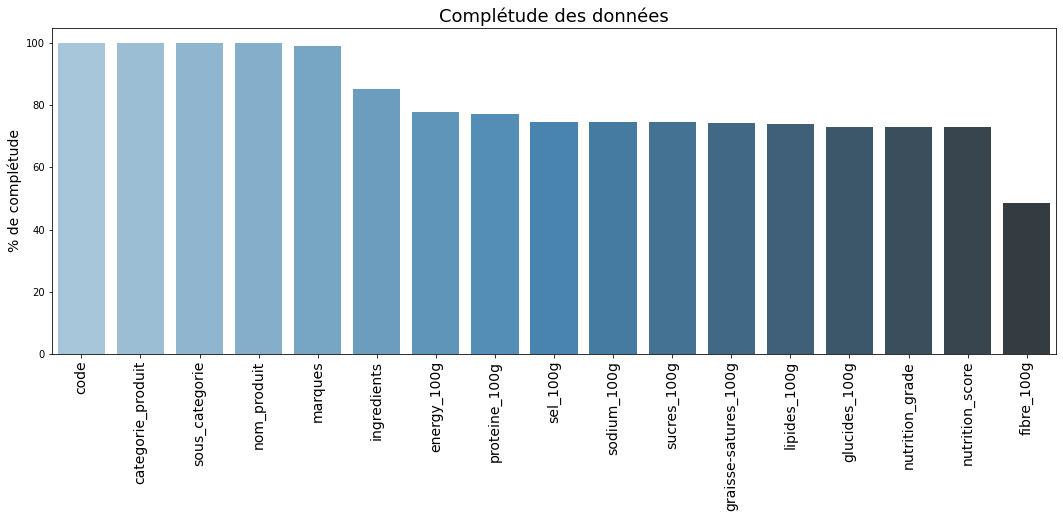

In [39]:
# Appel de la fonction
titre = ("Complétude des données")

graphique_completude_donnees(dataDiab, titre)

In [40]:
# synthese 
synthese_generale(df,dataDiab, 0.4)

Le DataFrame a 320772 lignes et 162 colonnes,
soit 605% des données du DataFrame original.

Il y a 159 colonnes ayant des valeurs manquantes,
dont 128 colonnes avec 40% de données manquantes.

Taille du jeu de donnée avant nettoyage (320772, 162)
Taille du jeu de donnée après nettoyage (53014, 17)
Nous avons supprimé 145 columns
Nous avons supprimé 267758 rows
Les types de données :
 float64    107
object      55
dtype: int64


**<center>Synthèse du jeu de données</center>**

| **Indicateurs** | **Valeurs** |
| :--- | :---: |
| **Nombre de colonnes** | 17 |
| **Nombre de lignes** | 53.014 (17% des données du dataset original)  |
| **Nombre de variables qualitatives** | 7 |
| **Nombre de variables quantitatives** | 10 |
| **Données manquantes** | 13 colonnes dont 1 avec 40% de données manquantes |
| **Suppression des colonnes** | 145 |
| **Suppression des lignes** | 267.758 |

## <center><font color=DarkBlue>1.3 - Nettoyage du fichier</font></center>

### <center><font color=DarkGreen>1.3.1 - Traitement des valeurs aberrantes (outliers)</font></center>

Pour ne pas fausser les analyses, je vais retirer du dataframe les produits présentant des valeurs abérrantes sur les colonnes relatives à l'énergie et aux nutriments.

Je vais procéder par :
- Nettoyage (dit nettoyage métier) par **la suppression des valeurs aberrantes** (df_clean_outliers), 
- Nettoyage statistique, c'est-à-dire le repérage des **valeurs atypique ou rares** (df_stat).

In [41]:
# Statistiques descriptives
dataDiab.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
fibre_100g,25674.0,2.64,3.74,0.0,0.40,1.70,3.50,86.2
lipides_100g,39148.0,13.39,17.08,0.0,1.30,6.80,21.40,380.0
graisse-satures_100g,39415.0,5.38,8.32,0.0,0.30,1.90,7.50,210.0
glucides_100g,38735.0,27.62,27.42,0.0,4.00,14.00,53.50,190.0
sucres_100g,39507.0,12.95,18.38,0.0,1.00,4.00,16.60,105.0
proteine_100g,40988.0,7.64,7.28,0.0,1.70,6.00,11.00,86.0
sel_100g,39556.0,0.90,2.03,0.0,0.07,0.55,1.20,211.0
sodium_100g,39554.0,0.35,0.80,0.0,0.03,0.22,0.47,83.0
energy_100g,41201.0,1094.03,791.93,0.0,397.00,1008.00,1642.00,18700.0
nutrition_score,38729.0,8.39,9.09,-15.0,1.00,8.00,15.00,40.0


Je note que :

- Les fibres, lipides, acides gras saturés, glucides, sucre et sel ont des valeurs > 100 ;
- La variable "énergie" dépasse largement la valeur maximale de 3.800kJ ;

Toutes ces entrées sont visiblement des erreurs que nous allons corriger dans le nettoyage des outliers.

#### <center><font color=DarkGreen>1.3.1.1 - Nettoyage des outliers</font></center>

Quand on parle du contenu nutritionnel des aliments, on entend évidemment les substances qui les composent, autrement appelées nutriments. 

Les variables suffixées avec **_100g** nous indiquent la quantité de nutriment pour 100 grammes de produit.

Les valeurs renseignées ne peuvent donc logiquement pas excéder 100. 

Je supprime donc les lignes dont au moins 1 des variables de nutriments est supérieur au seuil :

In [42]:
df_clean_outliers = dataDiab.copy()

In [43]:
g_per_100g_features = ['fibre_100g','lipides_100g','graisse-satures_100g','glucides_100g','sucres_100g',
                       'proteine_100g','sel_100g','sodium_100g']
df_clean_outliers = df_clean_outliers[~(df_clean_outliers[g_per_100g_features] > 100).any(axis=1)]

D'autre part, les valeurs de **graisse-satures_100g** ne peuvent pas être supérieurs à **lipides_100g**, de même pour les valeurs de **sodium_100g** qui ne peuvent pas être supérieurs à **sel_100g**.

Je supprimme donc les lignes qui remplissent ces conditions :

In [44]:
df_clean_outliers = df_clean_outliers[~((df_clean_outliers['graisse-satures_100g'] > df_clean_outliers['lipides_100g']) 
                                | (df_clean_outliers['sodium_100g'] > df_clean_outliers['sel_100g']))]

In [45]:
df_clean_outliers = df_clean_outliers[~((df_clean_outliers['energy_100g'] > 3700))]

Enfin, les densité d'energie maximales pour 100g sont de **3700 kJ/100g** (source Wikipedia).   
Je supprime donc toutes les lignes dont la variable <code>energy_100g</code> est supérieur à **3700 (ou 900 kcal/100g)**.

In [46]:
df_clean_outliers.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
fibre_100g,25553.0,2.65,3.75,0.0,0.40,1.70,3.50,86.2
lipides_100g,39026.0,13.28,16.72,0.0,1.30,6.80,21.30,100.0
graisse-satures_100g,39266.0,5.35,8.17,0.0,0.30,1.90,7.40,100.0
glucides_100g,38620.0,27.63,27.39,0.0,4.00,14.00,53.50,100.0
sucres_100g,39361.0,12.94,18.35,0.0,1.00,4.00,16.60,100.0
proteine_100g,40841.0,7.66,7.28,0.0,1.70,6.00,11.00,86.0
sel_100g,39410.0,0.89,1.73,0.0,0.08,0.56,1.20,76.2
sodium_100g,39408.0,0.35,0.68,0.0,0.03,0.22,0.47,30.0
energy_100g,41051.0,1087.16,771.00,0.0,396.00,1005.00,1640.00,3700.0
nutrition_score,38587.0,8.37,9.10,-15.0,1.00,8.00,15.00,40.0


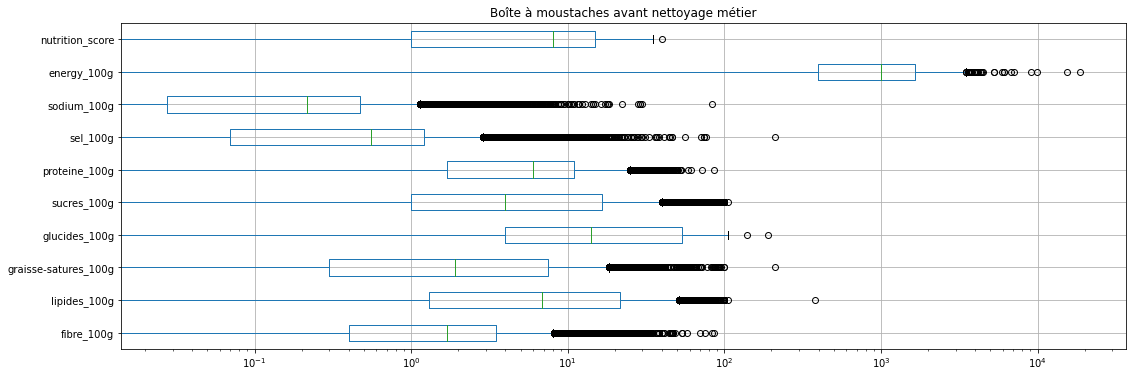

In [47]:
# Boîte à moustaches pour visualiser les quartiles et outliers
fig, axs = plt.subplots(figsize=(18, 6))
fig = dataDiab.select_dtypes(include="number").boxplot(vert=False)
axs.set_xscale("log")
plt.title("Boîte à moustaches avant nettoyage métier")
plt.show()

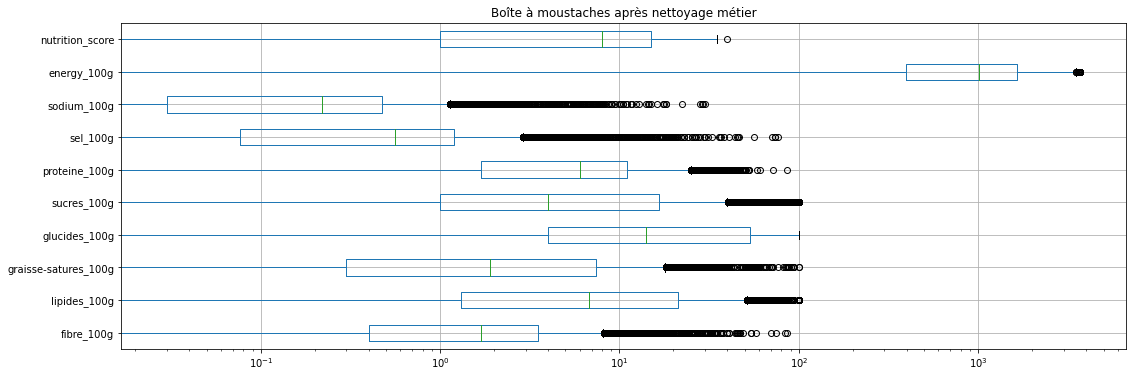

In [48]:
# Boîte à moustaches pour visualiser les quartiles et outliers
fig, axs = plt.subplots(figsize=(18, 6))
fig = df_clean_outliers.select_dtypes(include="number").boxplot(vert=False)
axs.set_xscale("log")
plt.title("Boîte à moustaches après nettoyage métier")
plt.show()

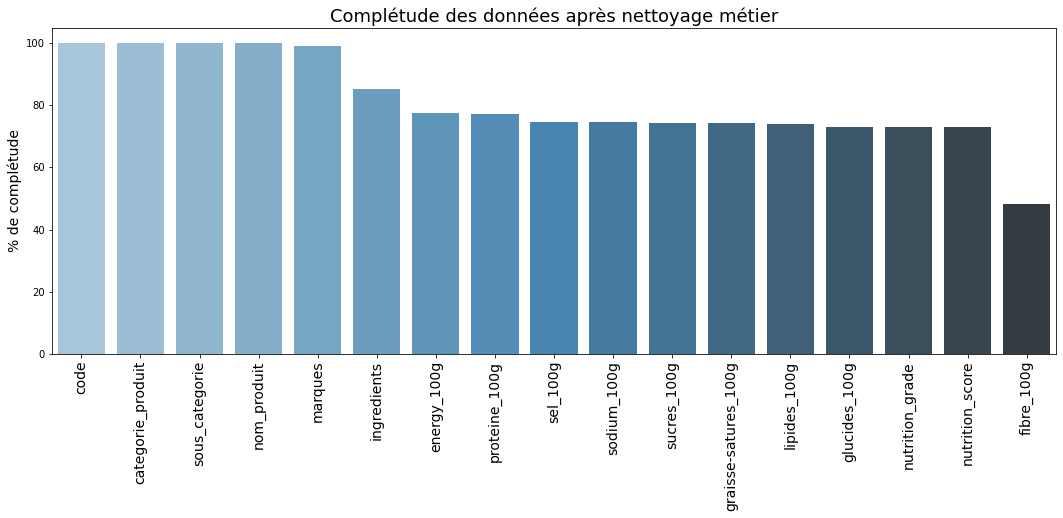

In [49]:
# Appel de la fonction de représentation graphique de la complétude de données
titre = ("Complétude des données après nettoyage métier")

graphique_completude_donnees(df_clean_outliers, titre)

In [50]:
synthese_generale(df_clean_outliers, dataDiab, 0.5)

Le DataFrame a 52864 lignes et 17 colonnes,
soit 100% des données du DataFrame original.

Il y a 13 colonnes ayant des valeurs manquantes,
dont 1 colonnes avec 50% de données manquantes.

Taille du jeu de donnée avant nettoyage (52864, 17)
Taille du jeu de donnée après nettoyage (53014, 17)
Nous avons supprimé 0 columns
Nous avons supprimé -150 rows
Les types de données :
 float64    10
object      7
dtype: int64


Après ces quelques opérations de nettoyage, les valeurs médianes, d'écart-type, de minimum et maximum sont plus cohérentes. 
Je vais pouvoir exploiter ces données pour estimer les valeurs manquantes.

Je vais regarder la distribution de ces variables et définir si elles suivent une loi normale, ce qui m'aidera à prendre une décision pour la méthode d'imputation des valeurs manquantes.

#### <center><font color=DarkGreen>1.3.1.1 - Nettoyage statistique</font></center>

In [51]:
# Copie du DataFrame métier pour appliquer le nettoyage statistique
df_stat = df_clean_outliers.copy()

nutriments = ["fibre_100g", "lipides_100g", "graisse-satures_100g", "glucides_100g",
       "sucres_100g", "proteine_100g", "sel_100g", "sodium_100g"]

# Calcul de l"écart-interquartile pour appliquer le nettoyage statistique
for var in nutriments:
    IQR = round(df_stat[var].quantile(0.75) - df_stat[var].quantile(0.25), 1)
    limite_haute = round(df_stat[var].quantile(0.75) +(1.5 * IQR),1)
    df_stat = df_stat.loc[(df_stat[var].isnull()) | (df_stat[var] <=limite_haute)]

# Affichage de la dimension du dataframe
print("Le DataFrame HORS OUTLIERS a " + str(df_stat.shape[0]) + " lignes ( "
     + str(round(len(df_stat)/len(df)*100,1)) + " % du DataFrame original.)")

Le DataFrame HORS OUTLIERS a 41332 lignes ( 12.9 % du DataFrame original.)


In [52]:
df_stat.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
fibre_100g,19087.0,1.99,1.89,0.0,0.50,1.50,3.00,8.20
lipides_100g,28184.0,8.54,9.81,0.0,1.00,4.30,13.60,50.60
graisse-satures_100g,27996.0,2.94,3.94,0.0,0.20,1.20,3.90,16.40
glucides_100g,27872.0,24.30,25.27,0.0,4.80,12.70,45.20,100.00
sucres_100g,28065.0,7.53,8.88,0.0,1.10,3.60,11.00,35.70
proteine_100g,29443.0,6.76,5.94,0.0,1.60,5.71,10.00,24.80
sel_100g,28166.0,0.71,0.67,0.0,0.09,0.61,1.13,2.79
sodium_100g,28164.0,0.28,0.26,0.0,0.04,0.24,0.44,1.10
energy_100g,29619.0,838.95,649.63,0.0,278.00,628.00,1385.00,3700.00
nutrition_score,27591.0,5.52,7.90,-14.0,0.00,4.00,12.00,30.00


In [53]:
df_stat.head(1)

,code,nom_produit,marques,categorie_produit,sous_categorie,ingredients,fibre_100g,lipides_100g,graisse-satures_100g,glucides_100g,sucres_100g,proteine_100g,sel_100g,sodium_100g,energy_100g,nutrition_grade,nutrition_score
182,0000005200016,lentilles vertes,Bertrand Lejeune,Céréales et Patates,Légumineuses,lentilles vertes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Contrôle de la valeur max des glucides = 100** :

In [54]:
df_stat.loc[df_stat["glucides_100g"].idxmax(), 
              ["nom_produit", "marques","categorie_produit", "sous_categorie", "energy_100g", "lipides_100g", 
               "glucides_100g", "proteine_100g"]]

nom_produit              cassonade
marques                    Erstein
categorie_produit    Snacks sucrés
sous_categorie          Confiserie
energy_100g                 1674.0
lipides_100g                   0.0
glucides_100g                100.0
proteine_100g                  0.0
Name: 146335, dtype: object

C'est de la cassonade dont c'est une valeur atypique mais pas aberrante.

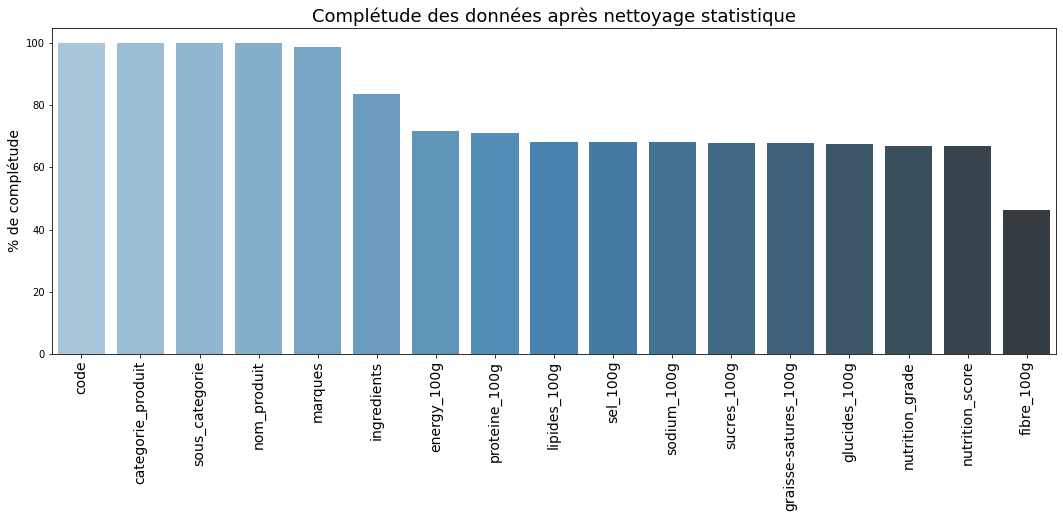

In [55]:
# Appel de la fonction de représentation graphique de la complétude de données
titre = ("Complétude des données après nettoyage statistique")

graphique_completude_donnees(df_stat, titre)

### <center><font color=DarkGreen>1.3.2 - Traitement des valeurs manquantes</font></center>

Je vais créer un **dataframe final - nettoyé**, que j'appelle : <code>**df_clean**</code>

<AxesSubplot:>

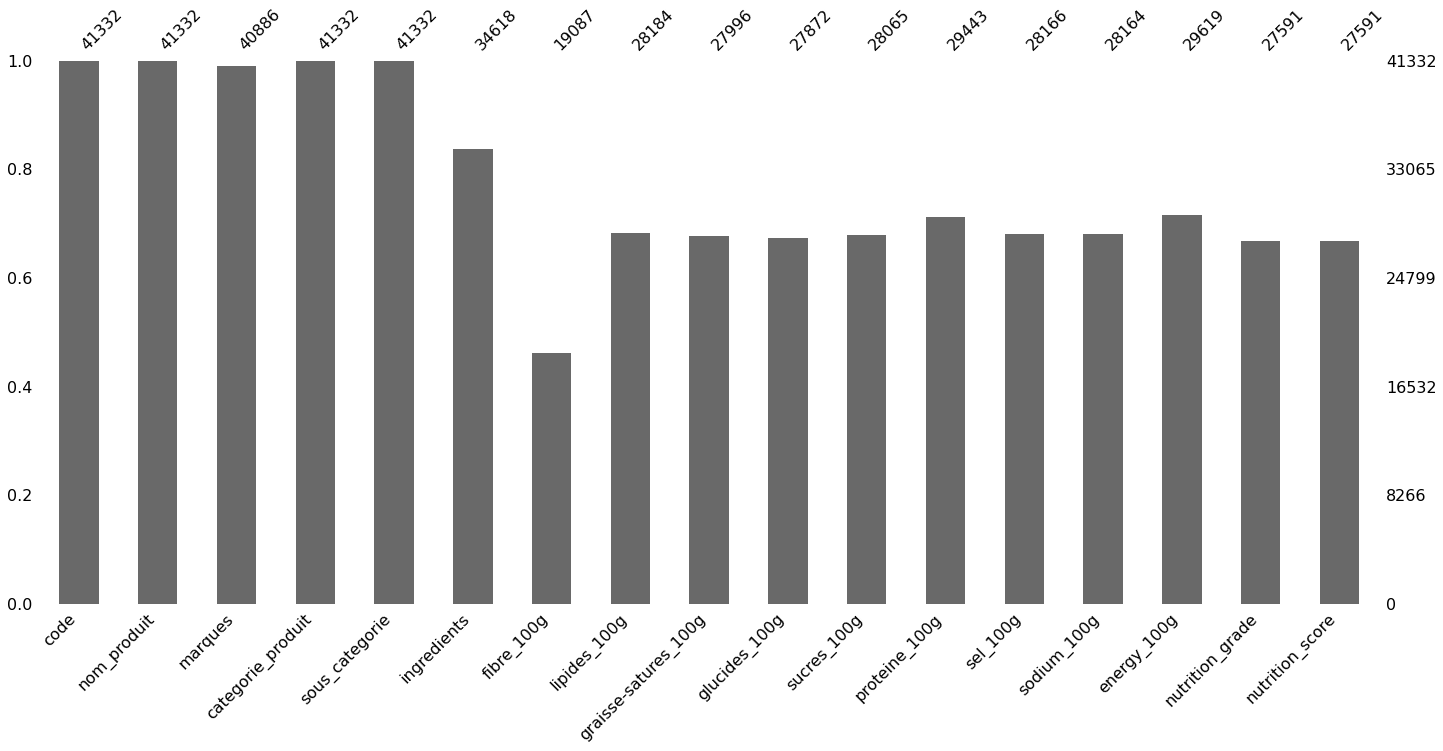

In [56]:
df_clean = df_stat.copy()

# Visualisation du nombre de données manquantes par colonne avec la librairie missingno
msno.bar(df_clean)

In [57]:
resume_col_data(df_clean)

Le DataFrame a 17 colonnes et 41332 lignes (y compris les en-têtes).
Il y a 13 colonnes ayant des valeurs manquantes.
Les types de données :
 float64    10
object      7
dtype: int64


,Valeurs uniques,Valeurs non-nulles,Valeurs manquantes,% Valeurs manquantes,Valeurs à zéro,% Zéro,Type Données
fibre_100g,345,19087,22245,53.8,3368,8.1,float64
nutrition_score,46,27591,13741,33.2,1799,4.4,float64
nutrition_grade,6,27591,13741,33.2,0,0.0,object
glucides_100g,1170,27872,13460,32.6,764,1.8,float64
graisse-satures_100g,629,27996,13336,32.3,4220,10.2,float64
sucres_100g,699,28065,13267,32.1,1445,3.5,float64
sodium_100g,1372,28164,13168,31.9,2268,5.5,float64
sel_100g,1401,28166,13166,31.9,2269,5.5,float64
lipides_100g,779,28184,13148,31.8,2465,6.0,float64
proteine_100g,640,29443,11889,28.8,1500,3.6,float64


In [58]:
df_clean.describe(exclude="number").transpose().round()

,count,unique,top,freq
code,41332,41332,0000005200016,1
nom_produit,41332,33628,lait demi-écrémé,40
marques,40886,11038,Carrefour,1392
categorie_produit,41332,9,Boissons,7509
sous_categorie,41332,34,Aliments préparés,4628
ingredients,34618,29931,semoule de blé dur de qualité supérieure,180
nutrition_grade,27591,5,c,7074


#### <center><font color=DarkRed>1.3.2.1 Remplissage des valeurs qualitatives manquantes par "Non spécifié" (hors nutrition-grade)</font></center>

En effet, <code>**code et product_name**</code> sont des variables entièrement renseignées, car les lignes sans valeurs ou dupliquées ont été supprimées. 

Quant à <code>**nutrition_grade**</code>, je vais appliquer une condition en fonction de <code>**nutrition_score**</code>.

In [59]:
remplissage_var_quali = ['marques', "categorie_produit", "sous_categorie", 'ingredients']

for var in remplissage_var_quali:
    missing = df_clean[var].isnull().sum()
    print("Le nombre de valeurs manquantes pour {0} est : {1}".format(var, missing))
    df_clean[var].fillna("Non spécifié", inplace=True)

# Appel de la fonction comptage valeurs manquantes
resume_col_data(df_clean.select_dtypes(exclude="number"))

Le nombre de valeurs manquantes pour marques est : 446
Le nombre de valeurs manquantes pour categorie_produit est : 0
Le nombre de valeurs manquantes pour sous_categorie est : 0
Le nombre de valeurs manquantes pour ingredients est : 6714
Le DataFrame a 7 colonnes et 41332 lignes (y compris les en-têtes).
Il y a 1 colonnes ayant des valeurs manquantes.
Les types de données :
 object    7
dtype: int64


,Valeurs uniques,Valeurs non-nulles,Valeurs manquantes,% Valeurs manquantes,Valeurs à zéro,% Zéro,Type Données
nutrition_grade,6,27591,13741,33.2,0,0.0,object
code,41332,41332,0,0.0,0,0.0,object
nom_produit,33628,41332,0,0.0,0,0.0,object
marques,11039,41332,0,0.0,0,0.0,object
categorie_produit,9,41332,0,0.0,0,0.0,object
sous_categorie,34,41332,0,0.0,0,0.0,object
ingredients,29932,41332,0,0.0,0,0.0,object


#### <center><font color=DarkRed>1.3.2.2 Variables quantitatives : Remplissage des valeurs manquantes </font></center>

Je vais regarder la distribution des variables numériques et définir si elles suivent une loi normale, ce qui m'aidera à prendre une décision pour la méthode d'imputation des valeurs manquantes.

In [60]:
#On repère les numerical_features
numerical_features = list(df_clean.select_dtypes(include=["float64","int64"]).columns)

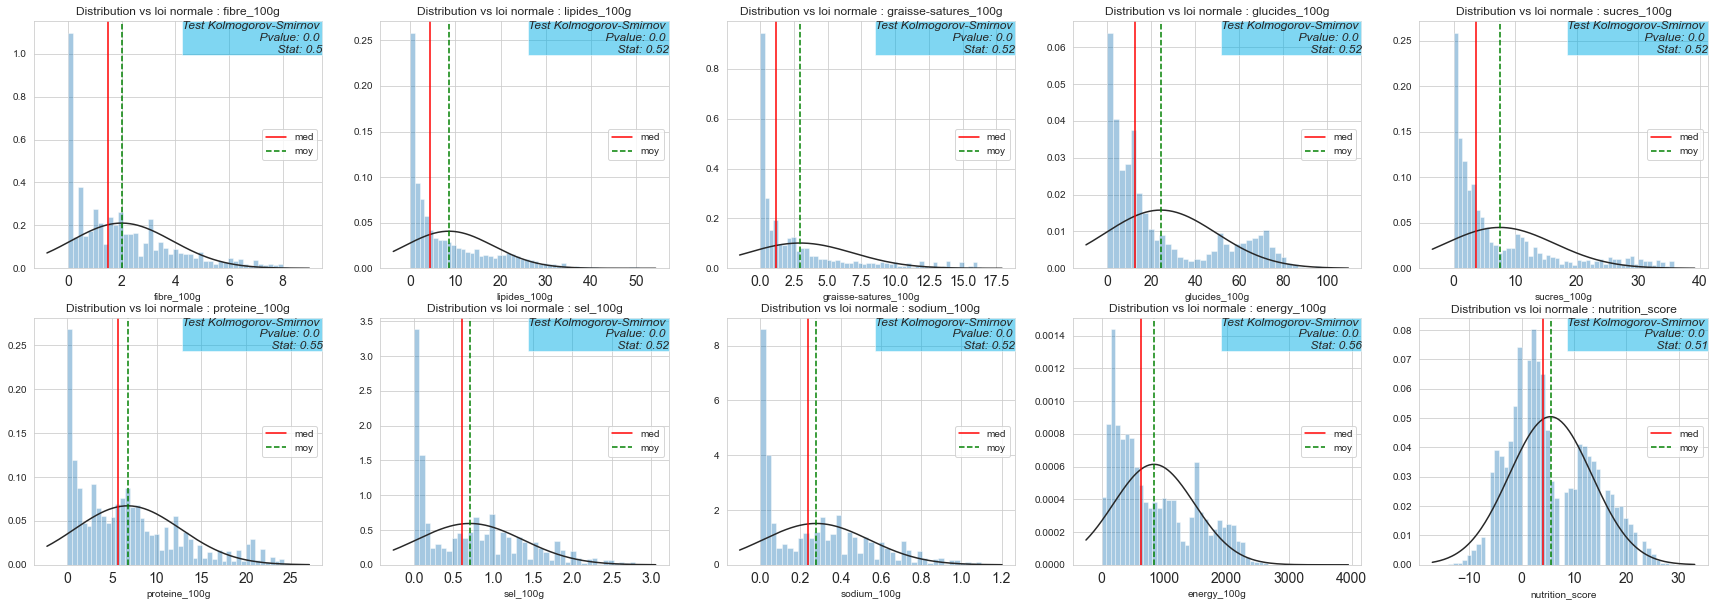

In [61]:
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
fig = plt.figure(figsize=(30,10))
gauche, largeur = .25, .5
bas_page, hauteur = .25, .5
droite = gauche + largeur
haut_page = bas_page + hauteur

sub = 0
for i in range(len(numerical_features)):
    fig.add_subplot(2,5,i+1)
    
    left, width = 0, 1
    bottom, height = 0, 1
    right = left + width
    top = bottom + height
    
    colonne = numerical_features[i]
    kstest = stats.kstest(df_clean[colonne].notnull(),'norm')
    ax = sns.distplot(df_clean[colonne], fit=stats.norm, kde=False)
    ax.set_title("Distribution vs loi normale : {}".format(colonne))
    ax.text(right, top, 'Test Kolmogorov-Smirnov \n Pvalue: {:.2} \n Stat: {:.2}'.format(kstest.pvalue, kstest.statistic),
            horizontalalignment='right',
            verticalalignment='top',
            style='italic', transform=ax.transAxes, fontsize = 12,
            bbox={'facecolor':'#00afe6', 'alpha':0.5, 'pad':0})
    ax.axvline(df_clean[colonne].median(), color="r", ls="-", label="med")
    #ax.text((gauche+.15), (bas_page+.6), "med", color="r", transform=axs.transAxes)
    ax.axvline(df_clean[colonne].mean(), color="g", ls="--", label="moy")
    #ax.text((gauche+.15), (bas_page+.4), "moy", color="g", transform=axs.transAxes)
    plt.xticks(fontsize=14)
    ax.legend(loc ="center right") 
    

    sub += 1
plt.show()

In [62]:
df_clean.skew()

code                    203.302730
fibre_100g                1.041374
lipides_100g              1.403671
graisse-satures_100g      1.699817
glucides_100g             0.982804
sucres_100g               1.494778
proteine_100g             0.948808
sel_100g                  0.781643
sodium_100g               0.781566
energy_100g               0.691131
nutrition_score           0.438465
dtype: float64

**Analyses des projections obtenues ci-dessus :**

- les résultats des **tests de Kolmogorov-Smirnov (Pvalue < au niveau de test de 5%)** je rejette donc l'hypothèse de normalité des distributions de ces variables. 
- les distributions de nos variables ne sont pas normales, elles sont plutôt étalées vers la droite (cf. skewness > 0), certaines distributions sont bimodales voire plurimodales ;
- la moyenne est supérieure à la médiane.

Par conséquent, l'imputation des valeurs manquantes avec la moyenne est inexacte, je vais donc imputer les valeurs manquantes comme suit :

**Pour les valeurs nutritionnelle :** 

**<font color=DarkRed>Règle : Remplacer les valeurs manquantes par la médiane, pondérée par les «sous-catégories»</font>**

**Explications :**

Par la **médiane**, car la **distribution des variables n'est pas normale et désaxée** *(majoritairement étalées vers la droite)*, **la moyenne étant supérieur à la médiane** *(donc sensible aux valeurs extrêmes)*. Et par **sous-catégorie**, car **agrégation très différente** *(par ex. les matières grasses et les légumes)*
  
 
**Pour la variable <code>energy_100g</code> :** 
- Je vais imputer les valeurs manquantes par la valeur énergétique = <font color=DarkRed>**37 * lipides + 17 * (glucides + protéines)**.</font>
**<center><font color=DarkRed>valeur énergétique</font></center>**

| **Indicateurs** | **Valeurs** |
| :--- | :---: |
| **Glucides** | 17 KJ/g |
| **Lipides**  | 37 KJ/g |
| **Proteine** | 17 KJ/g |

**Pour la variable <code>nutrition_grade</code> :**
- Je vais imputer les valeurs manquantes à l'aide d'une condition effectuée sur la variable <code>**nutrition_score**</code> en respectant les limites fixées dans le tableau ci-dessous

**<center><font color=DarkRed>condition</font></center>**

| **Score de <code>nutrition_score</code>** | | **Valeurs de remplissages** |
| :--- | :---: |:---: |
| **Entre -15 et -1**| =  | A |
| **Entre O et 2**   | =  | B |
| **Entre 3 et 10**  | =  | C |
| **Entre 11 et 18** | =  | D |
| **Entre 19 et 40** | =  | E |

Je vais créer le dataframe final : **df_clean_impute**

In [63]:
df_clean_impute = df_clean.copy()

In [64]:
# Création d'une liste de variables pour lesquelles nous avons la connaissance métier
nutriments_impute = ['fibre_100g', 'lipides_100g', 'graisse-satures_100g', 'glucides_100g', 
                     'sucres_100g', 'proteine_100g', 'sel_100g','sodium_100g', 'nutrition_score']

# DONNEES NUTRITIONNELLES : Remplissage des valeurs manquantes par la médiane
for var in nutriments_impute:
    df_clean_impute[var] = df_clean_impute.groupby(["categorie_produit", 
                                      "sous_categorie"])[var].transform(lambda grp: grp.fillna(grp.median()))
    
# Appel de la fonction
resume_col_data(df_clean_impute.select_dtypes(include="number"))

Le DataFrame a 10 colonnes et 41332 lignes (y compris les en-têtes).
Il y a 1 colonnes ayant des valeurs manquantes.
Les types de données :
 float64    10
dtype: int64


,Valeurs uniques,Valeurs non-nulles,Valeurs manquantes,% Valeurs manquantes,Valeurs à zéro,% Zéro,Type Données
energy_100g,2646,29619,11713,28.3,113,0.3,float64
fibre_100g,345,41332,0,0.0,11374,27.5,float64
lipides_100g,782,41332,0,0.0,6213,15.0,float64
graisse-satures_100g,628,41332,0,0.0,8010,19.4,float64
glucides_100g,1171,41332,0,0.0,764,1.8,float64
sucres_100g,699,41332,0,0.0,1600,3.9,float64
proteine_100g,639,41332,0,0.0,1829,4.4,float64
sel_100g,1404,41332,0,0.0,2269,5.5,float64
sodium_100g,1374,41332,0,0.0,2268,5.5,float64
nutrition_score,47,41332,0,0.0,1799,4.4,float64


#### <center><font color=DarkRed>1.3.2.3 Énergie : Remplissage les valeurs manquantes en utilisant des calculs avec les nutriments</font></center>

Toute les variables nutriments ont leurs valeurs renseignées, je peux compléter la variable **Energie**.

- Transformer les **valeurs à zéro** en **NaN**.

- Remplacer les **NaN** par la **valeur énergétique = 37 * lipides + 17 * (glucides + protéines)**.

In [65]:
# ENERGIE : Remplissage par le calcul de l'énergie
df_clean_impute["energy_100g"] = df_clean_impute["energy_100g"].replace(0, np.nan)
df_clean_impute["energy_100g"].fillna((df_clean_impute["lipides_100g"] * 37) + 
                                      ((df_clean_impute["glucides_100g"] + df_clean_impute["proteine_100g"]) * 17), 
                                      inplace=True)

# Appel de la fonction comptage valeurs manquantes
resume_col_data(df_clean_impute.select_dtypes(include="number"))

Le DataFrame a 10 colonnes et 41332 lignes (y compris les en-têtes).
Il y a 0 colonnes ayant des valeurs manquantes.
Les types de données :
 float64    10
dtype: int64


,Valeurs uniques,Valeurs non-nulles,Valeurs manquantes,% Valeurs manquantes,Valeurs à zéro,% Zéro,Type Données
fibre_100g,345,41332,0,0.0,11374,27.5,float64
lipides_100g,782,41332,0,0.0,6213,15.0,float64
graisse-satures_100g,628,41332,0,0.0,8010,19.4,float64
glucides_100g,1171,41332,0,0.0,764,1.8,float64
sucres_100g,699,41332,0,0.0,1600,3.9,float64
proteine_100g,639,41332,0,0.0,1829,4.4,float64
sel_100g,1404,41332,0,0.0,2269,5.5,float64
sodium_100g,1374,41332,0,0.0,2268,5.5,float64
energy_100g,2765,41332,0,0.0,82,0.2,float64
nutrition_score,47,41332,0,0.0,1799,4.4,float64


#### <center><font color=DarkRed>1.3.2.4 Nutrition_grade : Remplissage des valeurs manquantes en utilisant une condition sur nutrition_score</font></center>

Pour remplir les valeurs manquantes, je m'aide de la règle la plus simple possible comme décrite par l'image ci-dessous : 

Le Nutri-score fournit les informations nutritionnelles d'un produit alimentaire sur la base d'une échelle à 5 niveaux allant de **A à E**.
Le **A vert** représente une composition nutritionnelle du produit concerné **plutôt favorable**, tandis que le **E rouge** représente une composition nutritionnelle **moins favorable**.

<center>
<img src="../image/nutriscore.png", style="width:500px"> </td>
</center>

In [66]:
# mise en majuscule des valeurs de la variable 'nutrition_grade_fr'
df_clean_impute['nutrition_grade'] = df_clean_impute['nutrition_grade'].str.upper()
# NUTRITION GRADE : Remplissage des valeurs manquantes sur la base des valeurs de NUTRITION SCORE
def test(rows):
    if pd.isnull(rows["nutrition_grade"]):
        if (rows["nutrition_score"] <=-4):
            return "A"
        elif ((rows["nutrition_score"] >-4) & (rows["nutrition_score"] <=2)):
            return "B"
        elif ((rows["nutrition_score"] >2) & (rows["nutrition_score"] <=10)):
            return "C"
        elif ((rows["nutrition_score"] >10) & (rows["nutrition_score"] <=18)):
            return "D"
        else: 
            return "E"
    else:
        return rows["nutrition_grade"]

# Appel de la fonction
df_clean_impute["nutrition_grade"] = df_clean_impute.apply(test, axis=1)

# Vérification des données de nutrition score sur les 3 df nettoyés
a = df_clean_outliers["nutrition_grade"].value_counts(dropna=False)
b = df_stat["nutrition_grade"].value_counts(dropna=False)
c = df_clean_impute["nutrition_grade"].value_counts(dropna=False)
df_compare = pd.concat([a, b, c], axis=1)
df_compare.head(6)

,nutrition_grade,nutrition_grade,nutrition_grade
NaN,14277.0,13741.0,NaN
d,10541.0,5845.0,NaN
c,8257.0,7074.0,NaN
e,7407.0,3151.0,NaN
a,6972.0,6390.0,NaN
b,5410.0,5131.0,NaN


In [67]:
df_clean_impute.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
fibre_100g,41332.0,1.51,1.65,0.0,0.00,1.10,2.30,8.20
lipides_100g,41332.0,7.75,9.57,0.0,0.40,3.90,12.00,50.60
graisse-satures_100g,41332.0,2.74,3.85,0.0,0.10,1.00,3.50,16.40
glucides_100g,41332.0,21.70,24.52,0.0,3.60,10.80,32.00,100.00
sucres_100g,41332.0,6.67,8.43,0.0,0.76,3.00,9.90,35.70
proteine_100g,41332.0,6.33,6.10,0.0,0.80,5.00,9.90,24.80
sel_100g,41332.0,0.66,0.65,0.0,0.03,0.59,1.17,2.79
sodium_100g,41332.0,0.26,0.26,0.0,0.01,0.23,0.46,1.10
energy_100g,41332.0,772.75,637.49,0.0,230.00,583.00,1190.00,3700.00
nutrition_score,41332.0,5.40,7.33,-14.0,0.00,4.00,11.00,30.00


#### <center><font color=DarkRed>1.3.2.5 Vérification des distributions avant et apres imputation des valeurs manquantes</font></center>

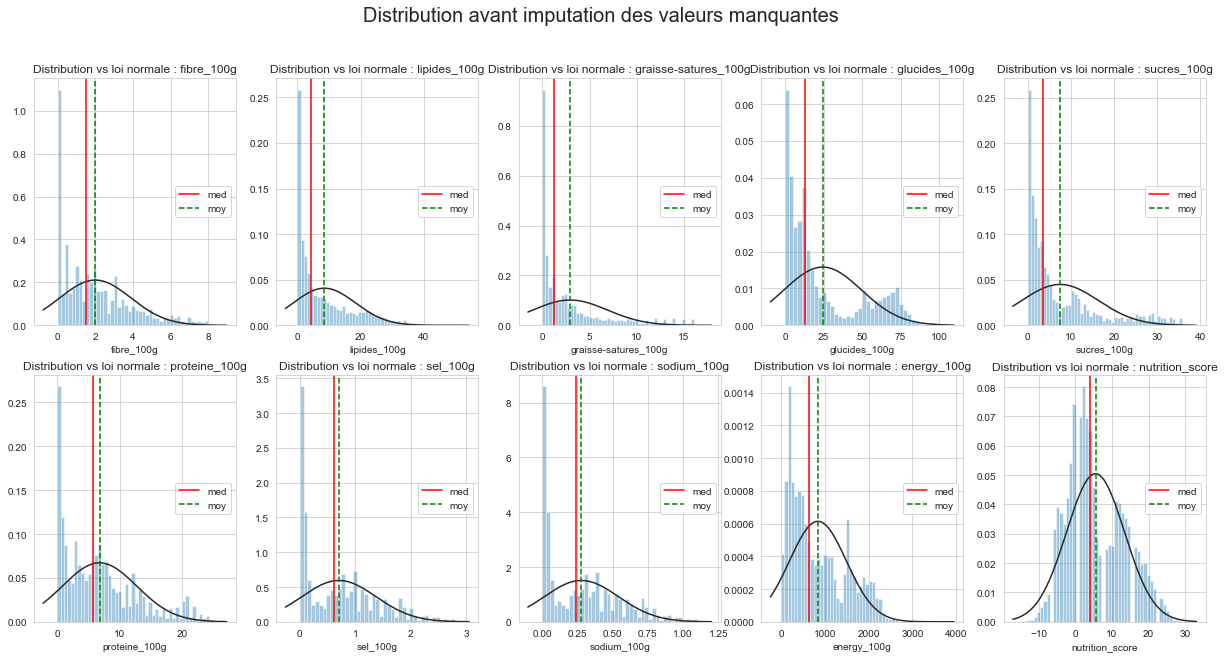

In [102]:
graph_distrib(df_clean, numerical_features, 'Distribution avant imputation des valeurs manquantes')

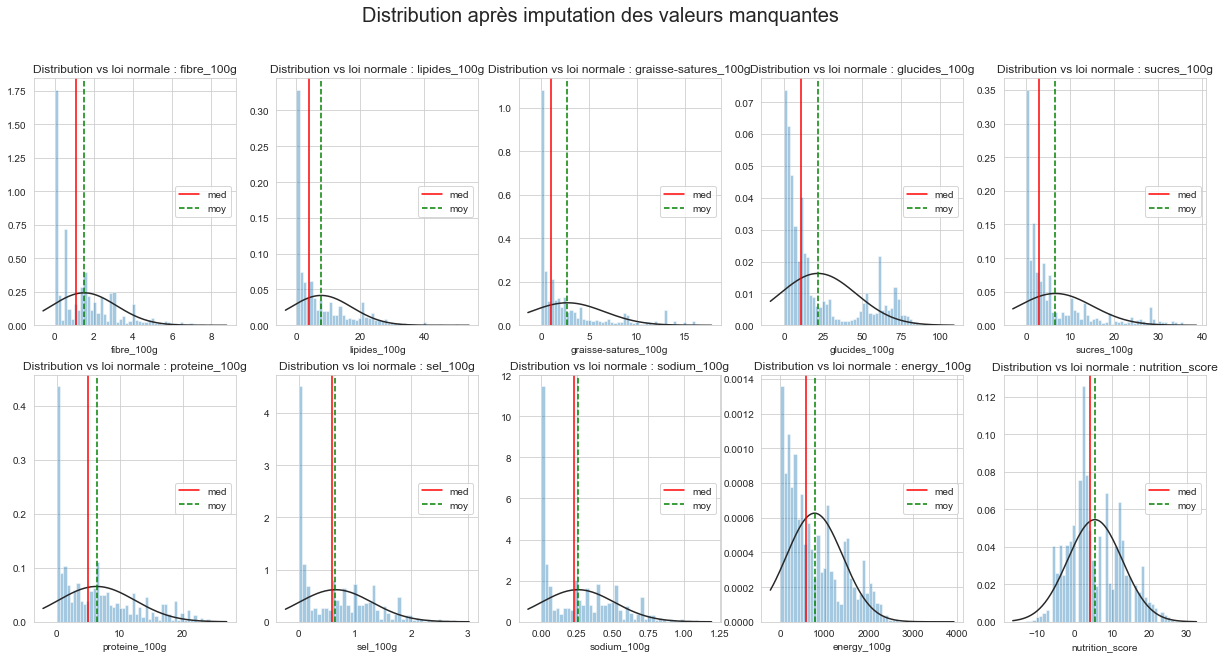

In [104]:
graph_distrib(df_clean_impute, numerical_features, 'Distribution après imputation des valeurs manquantes')

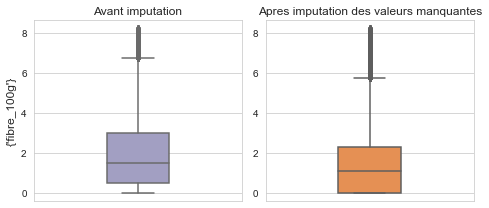

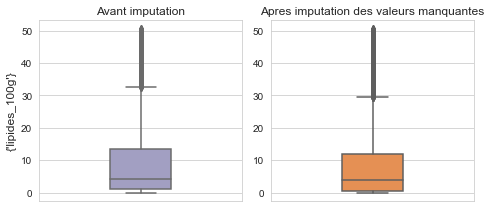

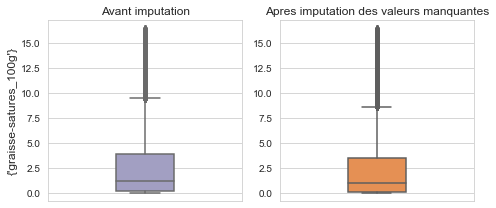

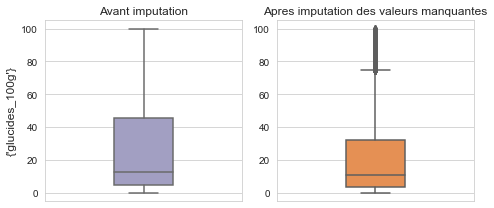

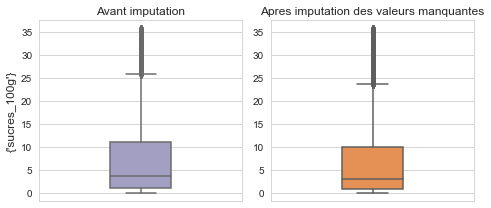

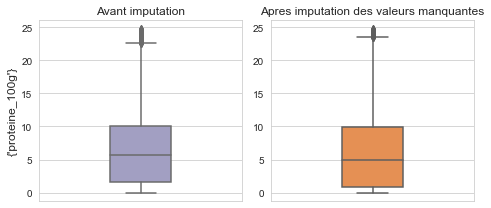

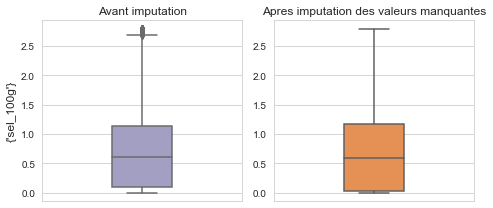

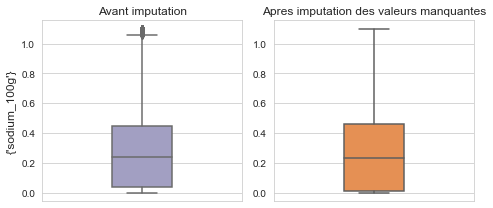

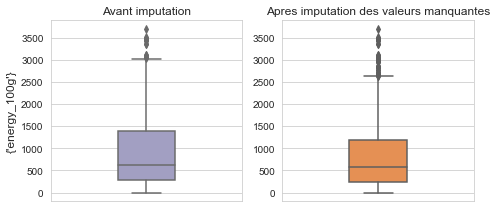

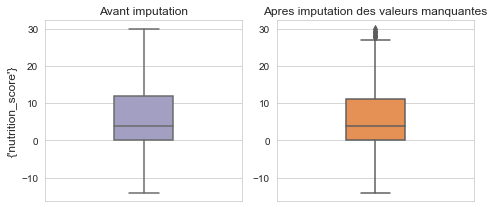

In [72]:
# Représentation graphique : boxplot de comparaison sur les 3 DataFrames
for var in df_clean.select_dtypes(include="number"):
    fig = plt.figure(figsize=(10,3))
    ax1 = fig.add_subplot(131)
    ax2 = fig.add_subplot(132)
    sns.boxplot(y=df_clean[var], ax=ax1, palette="Purples", width=0.3)
    ax1.set_title("Avant imputation", fontsize=12)
    ax1.set_ylabel({var}, fontsize=12)
    sns.boxplot(y=df_clean_impute[var], ax=ax2, palette="Oranges", width=0.3)
    ax2.set_title("Apres imputation des valeurs manquantes", fontsize=12)
    ax2.set_ylabel("")
    plt.tight_layout()
    plt.show()

In [80]:
df_clean.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
fibre_100g,19087.0,1.99,1.89,0.0,0.50,1.50,3.00,8.20
lipides_100g,28184.0,8.54,9.81,0.0,1.00,4.30,13.60,50.60
graisse-satures_100g,27996.0,2.94,3.94,0.0,0.20,1.20,3.90,16.40
glucides_100g,27872.0,24.30,25.27,0.0,4.80,12.70,45.20,100.00
sucres_100g,28065.0,7.53,8.88,0.0,1.10,3.60,11.00,35.70
proteine_100g,29443.0,6.76,5.94,0.0,1.60,5.71,10.00,24.80
sel_100g,28166.0,0.71,0.67,0.0,0.09,0.61,1.13,2.79
sodium_100g,28164.0,0.28,0.26,0.0,0.04,0.24,0.44,1.10
energy_100g,29619.0,838.95,649.63,0.0,278.00,628.00,1385.00,3700.00
nutrition_score,27591.0,5.52,7.90,-14.0,0.00,4.00,12.00,30.00


In [74]:
df_clean_impute.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
fibre_100g,41332.0,1.51,1.65,0.0,0.00,1.10,2.30,8.20
lipides_100g,41332.0,7.75,9.57,0.0,0.40,3.90,12.00,50.60
graisse-satures_100g,41332.0,2.74,3.85,0.0,0.10,1.00,3.50,16.40
glucides_100g,41332.0,21.70,24.52,0.0,3.60,10.80,32.00,100.00
sucres_100g,41332.0,6.67,8.43,0.0,0.76,3.00,9.90,35.70
proteine_100g,41332.0,6.33,6.10,0.0,0.80,5.00,9.90,24.80
sel_100g,41332.0,0.66,0.65,0.0,0.03,0.59,1.17,2.79
sodium_100g,41332.0,0.26,0.26,0.0,0.01,0.23,0.46,1.10
energy_100g,41332.0,772.75,637.49,0.0,230.00,583.00,1190.00,3700.00
nutrition_score,41332.0,5.40,7.33,-14.0,0.00,4.00,11.00,30.00


In [75]:
# synthese 
synthese_generale(df_clean_impute,df, 0.1)

Le DataFrame a 41332 lignes et 17 colonnes,
soit 13% des données du DataFrame original.

Il y a 0 colonnes ayant des valeurs manquantes,
dont 0 colonnes avec 10% de données manquantes.

Taille du jeu de donnée avant nettoyage (41332, 17)
Taille du jeu de donnée après nettoyage (320772, 162)
Nous avons supprimé -145 columns
Nous avons supprimé -279440 rows
Les types de données :
 float64    10
object      7
dtype: int64


**<center>Synthèse du jeu de données après nettoyage</center>**

| **Indicateurs** | **Valeurs** |
| :--- | :---: |
| **Nombre de colonnes** | 17 |
| **Nombre de lignes** | 41.332 (13% des données du dataset original)  |
| **Nombre de variables qualitatives** | 7 |
| **Nombre de variables quantitatives** | 10 |
| **Suppression des colonnes** | 145 |
| **Suppression des lignes** | 279.440 |

### <center><font color=DarkGreen>1.3.3 - Conclusion</font></center>

Le but de mon application est de recommander des produits en permettant aux utilisateurs de comparer les marques de recommander les produits les plus bénéfiques en fonction de leurs besoins (diabète, régime alimentaire, etc), tels que :

- **Réduire la consommation de sel, de sucre et de gras** ;

- **Choisir des produits les moins transformé possible** ;

- **Choisir des aliments riches en fibres alimentaires :** légumes et fruits, produits céréaliers à grains entiers, légumineuses, noix et graines, etc.

- **Limitez la consommation d’aliments sucrés et peu nutritifs :** (gâteaux, pâtisseries, sucreries, chocolat, biscuits, cassonade, miel, mélasse, sirops, confitures, etc.). Ceux-ci ne devraient être consommés qu’en petite quantité et de façon occasionnelle.

- **Portez une attention particulière aux portions et à la répartition des aliments contenant des glucides** : fruits, féculents, lait et substituts, légumineuses, certains légumes et aliments avec sucre ajouté.

- **Si consommation des substituts du sucre** (aspartame, sucralose, cyclamates, saccharines, stevia, etc.) ou des produits qui en contiennent, **le faire avec modération.**

## <center><font color=DarkBlue>1.3 - Enregistrement du fichier pour la suite de l'analyse</font></center> 

In [76]:
df_clean_impute.to_csv("../data/df_cleaned.csv", index=False)